In [1]:
from PIL import Image
from IPython.display import display
import numpy as np
import os

In [2]:
ims = {f.split('.')[0]: Image.open('library/'+f) for f in os.listdir('library') if f.endswith('.png')}


In [3]:
basis = [
    ims['library1'], ims['library2'], ims['library3'],
    ims['4-7'], ims['10-7'],
]
basis.append(Image.blend(ims['2-3'], basis[3], -10))
basis.append(Image.blend(Image.blend(basis[0], ims['2-7'],1.5), basis[5], -2))
basis.append(Image.blend(Image.blend(ims['10-5'], basis[5], -0.7), basis[6], -1))
basis.append(Image.blend(Image.blend(ims['2-5'], basis[5], -0.7), basis[3], -0.8))
basis.append(Image.blend(ims['21-8'], basis[0], -1))
basis.append(Image.blend(Image.blend(Image.blend(Image.blend(Image.blend(ims['26-8'], basis[5], -0.21), basis[7], -0.8), basis[9], -0.33), basis[0], 0.04), basis[6], -0.25))
basis.append(Image.blend(ims['70-7'], basis[6],-1))

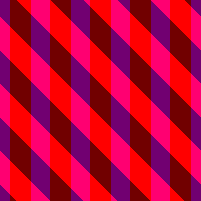

In [4]:
ims['70-7']

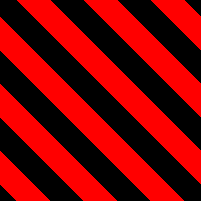

In [5]:
Image.blend(ims['70-7'], basis[6],-1)

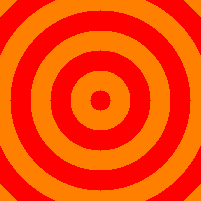

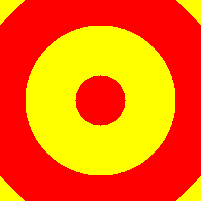

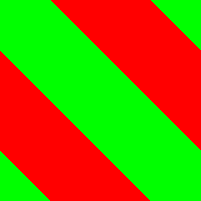

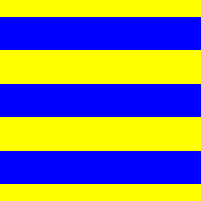

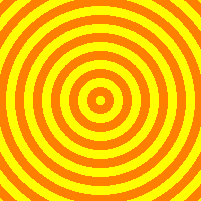

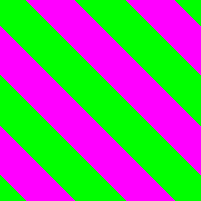

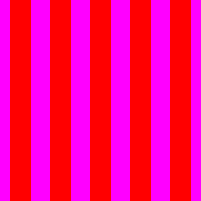

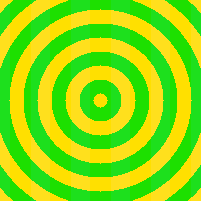

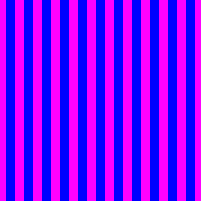

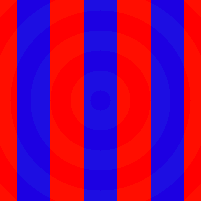

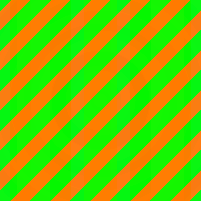

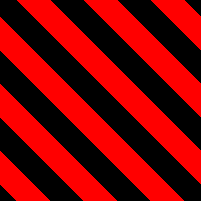

In [6]:
for im in basis:
    display(im)

In [8]:
def to_array(img):
    return np.array(img).flatten()

In [10]:
def is_solved(im_key, basis):
    coefficients, residual, _, _ = np.linalg.lstsq(
        np.stack([to_array(im) for im in basis], axis=1), to_array(ims[im_key])
    )
    return np.abs(residual[0]) < 10e-10     

In [16]:
unsolved_imgs = {key : im for key, im in ims.items() if not is_solved(key, basis)}

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
print(len(unsolved_imgs), print(imgs))

NameError: name 'imgs' is not defined

In [15]:
for key, im in unsolved_imgs.items():
    print(key)
    display(im)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


70-6
56-5
13-5
74-2
31-2
15-2
56-4
13-4
13-6
56-6
70-5
31-1
41-8
74-1
15-1
65-8
70-4
13-7
56-7
74-4
31-4
15-5
15-4
74-5
31-5
45-8
70-1
56-2
13-2
31-7
74-7
15-6
15-7
31-6
74-6
26-8
13-1
56-1
70-2
8-2
10-4
36-7
36-6
10-5
8-1
36-4
10-6
36-5
8-4
36-1
10-2
62-8
8-5
8-7
10-1
36-2
8-6
4-6
80-1
62-7
2-1
21-1
4-5
80-2
62-5
62-4
2-2
4-4
21-2
21-6
2-6
80-7
36-8
62-1
80-6
2-7
4-1
21-7
21-5
80-4
62-2
80-5
2-4
4-2
21-4
26-5
45-6
41-2
65-2
45-7
26-4
45-5
26-6
74-8
41-1
31-8
65-1
26-7
45-4
41-4
65-5
65-4
41-5
26-2
45-1
41-7
65-6
65-7
41-6
45-2
56-8
26-1


In [9]:
np.linalg.lstsq(np.stack([to_array(im) for im in basis], axis=1), to_array(ims["2-3"]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 3.31928368e-14, -1.02982500e-15,  7.89206748e-14,  4.43137255e-01,
        -8.54376453e-14,  5.56862745e-01, -3.10413239e-14,  2.90588442e-16,
         1.06777830e-16, -3.46463663e-16,  6.72864416e-16,  3.36549725e-16]),
 array([1.71773865e-17]),
 12,
 array([231959.81624198,  71762.75179388,  55851.09651251,  44410.28996526,
         38195.41319786,  34328.54166568,  33602.5100333 ,  29736.55969783,
         26742.56790536,  25654.27032734,  19675.89018653,  14642.54705395]))

In [12]:
is_solved("2-4", basis)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


False